In [1]:
from SimPEG import Mesh, EM, np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.style.use('classic')
import sys
sys.path.append("../../util_codes/")
from View import DataView
import copy
from ipywidgets import *
from DipoleWidget import DipoleWidget
# ['magma', 'inferno', 'plasma', 'viridis']

/Applications/Anaconda/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
dwidget = DipoleWidget()

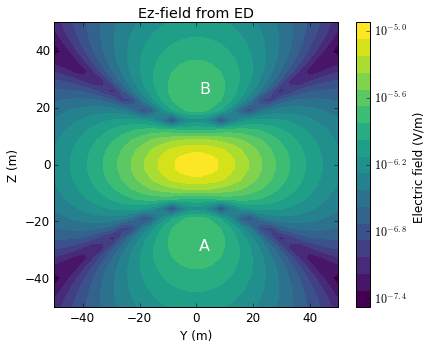

In [3]:
srcLoc = np.r_[0., 0., 0.] # source location
sig, f = np.r_[1.], np.r_[10.]
orientation = "z"
normal = "x"
functype = "E_from_ED"
# dwidget.SetDataview(srcLoc, sig, f, orientation, normal, functype, na=200, nb=200, loc=0)
x1, x2 = 1, 1
y1, y2 = -30, 30
npts2D = 30
npts = 20
# dwidget.dataview.plot2D_FD(component="real", view="z")
loc=20
dwidget.Dipole2Dviz(x1, y1, x2, y2, npts2D, npts, sig, f, view="z",component="amplitude", orientation=orientation, normal=normal, functype=functype, loc=loc)

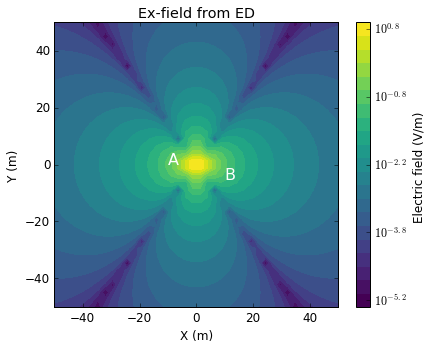

In [4]:
dwidget.InteractiveDipole()

In [5]:
from ipywidgets import 

SyntaxError: invalid syntax (<ipython-input-5-4486e4b63d09>, line 1)

In [6]:
temp.split("_")

NameError: name 'temp' is not defined

#  Set-up DataView using EM analytic functions

In [7]:
x = np.linspace(-50., 50., 200)
y = np.linspace(-50., 50., 200)
ED_full = DataView()
ED_galvanic = DataView()
ED_inductive = DataView()
sigvec = np.logspace(-4,4,100)
fvec = np.logspace(-4,8,100)
sigind, find = 0, 88
# sigind, find = 10, 80, 
srcLoc = np.r_[0., 0., 0.] # source location
sig, f = sigvec[sigind], np.r_[fvec[find]]  # conductivity (S/m), frequency (Hz)
ED_full.set_xyz(x,y, np.r_[0.], normal="Z") # set plane and locations ... 
ED_full.eval_2D(srcLoc, sig, f, "x", EM.Analytics.E_from_ElectricDipoleWholeSpace) # evaluate
ED_galvanic.set_xyz(x,y, np.r_[0.], normal="Z") # set plane and locations ... 
ED_galvanic.eval_2D(srcLoc, sig, f, "x", EM.Analytics.E_galvanic_from_ElectricDipoleWholeSpace) # evaluate
ED_inductive.set_xyz(x,y, np.r_[0.], normal="Z") # set plane and locations ... 
ED_inductive.eval_2D(srcLoc, sig, f, "x", EM.Analytics.H_from_ElectricDipoleWholeSpace) # evaluate

In [15]:
plt.contourf??

In [30]:
ED_full.val_xfs

array([[  1.40674424e-01 -1.11582242e-11j,
          1.40674424e-01 -1.47505141e-11j,
          1.40674424e-01 -1.94993090e-11j, ...,
          9.10303729e-01 +3.57853516e-01j,
          4.87405776e-01 +1.19506338e+00j,
          1.65633379e+00 +4.01687520e-01j],
       [  1.16790379e-01 -8.72635976e-12j,
          1.16790379e-01 -1.15357322e-11j,
          1.16790379e-01 -1.52495564e-11j, ...,
          8.62208870e-01 +3.38032356e-01j,
          4.62315357e-01 +1.13126986e+00j,
          1.56863361e+00 +3.79530151e-01j],
       [  9.69614240e-02 -7.05016961e-12j,
          9.69614240e-02 -9.31990733e-12j,
          9.69614240e-02 -1.23203660e-11j, ...,
          8.07723101e-01 +3.15422113e-01j,
          4.33990753e-01 +1.05886544e+00j,
          1.46919406e+00 +3.54261345e-01j],
       ..., 
       [  2.04087744e-09 -3.26307617e-12j,
          2.04084263e-09 -4.29992312e-12j,
          2.04078998e-09 -5.66346947e-12j, ...,
          0.00000000e+00 +0.00000000e+00j,
          0.000000

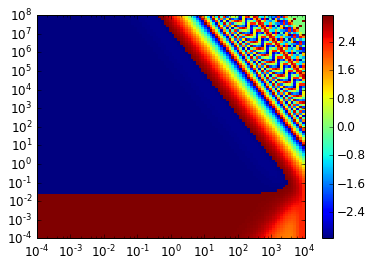

In [50]:
fig=plt.figure()
ax = plt.subplot(111)
ED_full.eval_loc(srcLoc,[0,1,0], sigvec, fvec, "x", EM.Analytics.E_from_ElectricDipoleWholeSpace)
aa = ax.pcolormesh(sigvec,fvec,np.angle(ED_full.val_xfs))
ax.set_xscale('log')
ax.set_yscale('log')
plt.colorbar(aa)

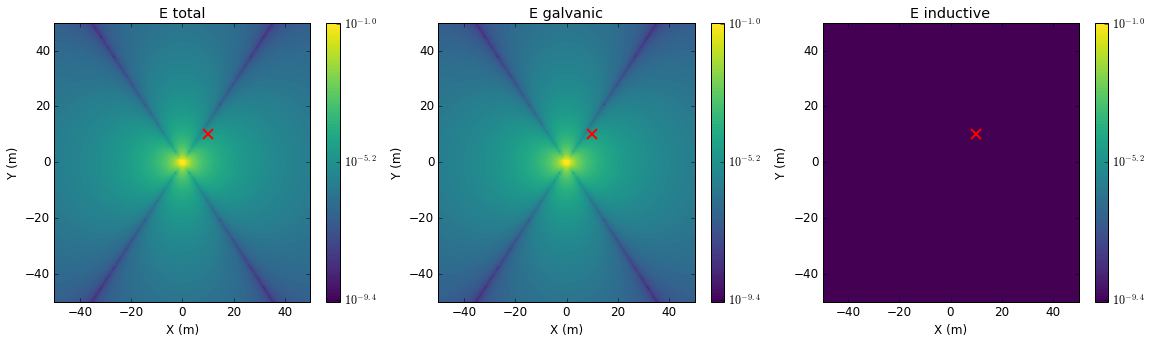

In [8]:
sigslider = FloatSlider(min=-8, max =8, step=0.5,value=0)
freqslider = FloatSlider(min=-4, max =10, step=0.5,value=-4)
obslocx = FloatSlider(min=-50, max =50, step=1,value=25)
obslocy = FloatSlider(min=-50, max =50, step=1,value=0)
Orientation= ToggleButtons(options=['x','y','z'],value='x')
Comp = ToggleButtons(options=['real','imag','amplitude','phase'],value='real')
View = ToggleButtons(options=['x','y','z','vec','amp'],value='x')
normal = ToggleButtons(options=['x','y','z'],value='z')


def interaction_2D(orientation, sigsl, freqsl,absloc, coordloc,component="real",view="x",normal="Z"):
    
    x = np.arange(-50., 50., step=1.01)
    y = np.arange(-50., 50., step=1.01)
    ED_full = DataView()
    ED_galvanic = DataView()
    ED_inductive = DataView()
    sigvec = 10.**np.arange(-8,8.5,0.5)
    fvec = 10.**np.arange(-4,10.5,1)
    # sigind, find = 10, 80, 
    srcLoc = np.r_[0., 0., 0.] # source location
    sig, f = 10.**sigsl, np.r_[10.**freqsl] # conductivity (S/m), frequency (Hz)
    
    if normal.upper() == "Z":
        obsLoc=np.c_[absloc,coordloc,np.r_[0.]]
        ED_full.set_xyz(x,y, np.r_[0.], normal=normal) # set plane and locations ...
        ED_galvanic.set_xyz(x,y, np.r_[0.], normal=normal)
        ED_inductive.set_xyz(x,y, np.r_[0.], normal=normal)
    elif normal.upper() == "Y":
        obsLoc=np.c_[absloc,np.r_[0.],coordloc]
        ED_full.set_xyz(x,np.r_[0.],y, normal=normal) # set plane and locations ... 
        ED_galvanic.set_xyz(x,np.r_[0.],y, normal=normal)
        ED_inductive.set_xyz(x,np.r_[0.],y, normal=normal)
    elif normal.upper() == "X":
        obsLoc=np.c_[np.r_[0.],absloc,coordloc]
        ED_full.set_xyz(np.r_[0.],x,y,normal=normal) # set plane and locations ... 
        ED_galvanic.set_xyz(np.r_[0.],x,y,normal=normal)
        ED_inductive.set_xyz(np.r_[0.],x,y,normal=normal)
    
    ED_full.eval_2D(srcLoc, sig, f, orientation, EM.Analytics.E_from_ElectricDipoleWholeSpace) # evaluate
    ED_galvanic.eval_2D(srcLoc, sig, f, orientation, EM.Analytics.E_galvanic_from_ElectricDipoleWholeSpace) # evaluate
    ED_inductive.eval_2D(srcLoc, sig, f, orientation, EM.Analytics.E_inductive_from_ElectricDipoleWholeSpace) # evaluate
    
    fig = plt.figure(figsize=(6.5*3, 5))
    ax0, ax1, ax2 = plt.subplot(131), plt.subplot(132), plt.subplot(133)
    ax0, dat0 = ED_full.plot2D_FD(ax=ax0,component=component,view=view, logamp=True, ncontour=100, showcontour=False, colorbar=False, cmap="viridis")
    vmin, vmax = dat0.cvalues.min(), dat0.cvalues.max()
    clim = [vmin, vmax]
    ax1, dat1 = ED_galvanic.plot2D_FD(ax=ax1,component=component,view=view, logamp=True, ncontour=100, showcontour=False, colorbar=False, clim=clim, cmap="viridis")
    ax2, dat2 = ED_inductive.plot2D_FD(ax=ax2,component=component,view=view, logamp=True, ncontour=100, showcontour=False, colorbar=False, clim=clim, cmap="viridis")
    axs = [ax0, ax1, ax2]
    dats = [dat0, dat1, dat2]
    titles = ["E total", "E galvanic", "E inductive"]
    for i in range(3):
        axs[i].plot(absloc, coordloc, 'rx', ms=10, markeredgewidth=2)
        axs[i].set_title(titles[i])
        cb = plt.colorbar(dats[0],ax=axs[i], format="$10^{%.1f}$", ticks=np.linspace(vmin, vmax, 3))
        
#     plt.tight_layout()

interact(interaction_2D,orientation= Orientation,sigsl=sigslider, freqsl=freqslider,absloc=obslocx, coordloc=obslocy,component=Comp,view=View,normal=normal)

from IPython.display import HTML
HTML('<iframe width="800" height="400" src="https://www.youtube.com/embed/1h7xwRbI9ms" frameborder="1" allowfullscreen></iframe>')


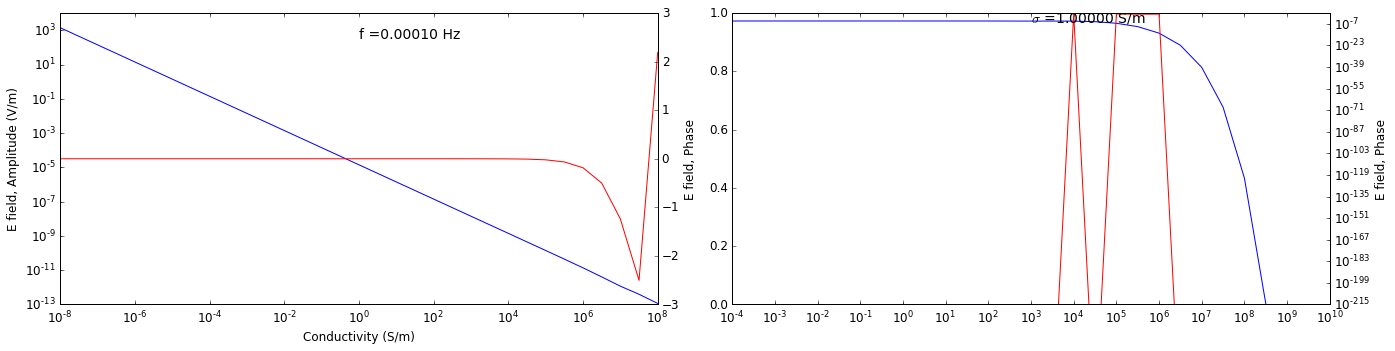

In [12]:
mode = ToggleButtons(options=['RI','AP','Phasor'],value='RI')
View2 = ToggleButtons(options=['x','y','z'],value='x')
sigslider = FloatSlider(min=-8, max =8, step=0.5,value=0)
freqslider = FloatSlider(min=-4, max =10, step=0.5,value=-4)
obslocx = FloatSlider(min=-50, max =50, step=1,value=25)
obslocy = FloatSlider(min=-50, max =50, step=1,value=0)
Orientation= ToggleButtons(options=['x','y','z'],value='x')
Comp = ToggleButtons(options=['real','imag','amplitude','phase'],value='real')
normal = ToggleButtons(options=['x','y','z'],value='z')


def interaction_1D(orientation,component,view,normal,sigsl,freqsl,absloc,coordloc,mode):

    x = np.arange(-50., 50., step=0.1)
    y = np.arange(-50., 50., step=0.1)
    ED_full = DataView()
    #ED_galvanic = DataView()
    #ED_inductive = DataView()
    
    sigvec = 10.**np.arange(-8,8.5,0.5)
    fvec = 10.**np.arange(-4,10.5,0.5)
    # sigind, find = 10, 80, 
    srcLoc = np.r_[0., 0., 0.] # source location
    sig, f = 10.**sigsl, np.r_[10.**freqsl] # conductivity (S/m), frequency (Hz)
    
    if normal.upper() == "Z":
        obsLoc=np.c_[absloc,coordloc,np.r_[0.]]
        ED_full.set_xyz(x,y, np.r_[0.], normal=normal) # set plane and locations ...
        #ED_galvanic.set_xyz(x,y, np.r_[0.], normal=normal)
        #ED_inductive.set_xyz(x,y, np.r_[0.], normal=normal)
    elif normal.upper() == "Y":
        obsLoc=np.c_[absloc,np.r_[0.],coordloc]
        ED_full.set_xyz(x,np.r_[0.],y, normal=normal) # set plane and locations ... 
        #ED_galvanic.set_xyz(x,np.r_[0.],y, normal=normal)
        #ED_inductive.set_xyz(x,np.r_[0.],y, normal=normal)
    elif normal.upper() == "X":
        obsLoc=np.c_[np.r_[0.],absloc,coordloc]
        ED_full.set_xyz(np.r_[0.],x,y,normal=normal) # set plane and locations ... 
        #ED_galvanic.set_xyz(np.r_[0.],x,y,normal=normal)
        #ED_inductive.set_xyz(np.r_[0.],x,y,normal=normal)
    
    ED_full.eval_loc(srcLoc,obsLoc, sigvec, fvec, orientation, EM.Analytics.E_from_ElectricDipoleWholeSpace) # evaluate
    #ED_galvanic.eval_loc(srcLoc,obsLoc, sigvec, fvec, orientation, EM.Analytics.E_galvanic_from_ElectricDipoleWholeSpace) # evaluate
    #ED_inductive.eval_loc(srcLoc,obsLoc, sigvec, fvec, orientation, EM.Analytics.E_inductive_from_ElectricDipoleWholeSpace) # evaluate
    
    fig = plt.figure(figsize=(6.5*3, 5))
    ax0 = plt.subplot(121)
    ax2 = plt.subplot(122)

    ax1 = ax0.twinx()
    ax3 = ax2.twinx()

    if mode =="RI":
        ax0 = ED_full.plot1D_FD(component="real",view=view,abscisse="Conductivity",slice=10.**freqsl, logamp=True, ax=ax0, color = 'blue')
        ax1 = ED_full.plot1D_FD(component="imag",view=view,abscisse="Conductivity",slice=10.**freqsl, logamp=True, ax=ax1,legend=False, color = 'red')
    
        ax2 = ED_full.plot1D_FD(component="real",view=view,abscisse="Frequency",slice=10.**sigsl, logamp=True, ax=ax2, color = 'blue')
        ax3 = ED_full.plot1D_FD(component="imag",view=view,abscisse="Frequency",slice=10.**sigsl, logamp=True, ax=ax3,legend=False, color = 'red')
    
    elif mode =="AP":
        ax0 = ED_full.plot1D_FD(component="Amplitude",view=view,abscisse="Conductivity",slice=10.**freqsl, logamp=True, ax=ax0, color = 'blue')
        ax1 = ED_full.plot1D_FD(component="Phase",view=view,abscisse="Conductivity",slice=10.**freqsl, logamp=True, ax=ax1,legend=False, color = 'red')
     
        ax2 = ED_full.plot1D_FD(component="Amplitude",view=view,abscisse="Frequency",slice=10.**sigsl, logamp=True, ax=ax3, color = 'blue')
        ax3 = ED_full.plot1D_FD(component="Phase",view=view,abscisse="Frequency",slice=10.**sigsl, logamp=True, ax=ax3,legend=False, color = 'red')
    
    elif mode =="Phasor":
        ax0 = ED_full.plot1D_FD(component="PHASOR",view=view,abscisse="Conductivity",slice=10.**freqsl, logamp=True, ax=ax0, color = 'black')
        ax2 = ED_full.plot1D_FD(component="PHASOR",view=view,abscisse="Frequency",slice=10.**sigsl, logamp=True, ax=ax2, color = 'black')
        
    plt.tight_layout()


interact(interaction_1D,orientation= Orientation,sigsl=sigslider, freqsl=freqslider,
         absloc=obslocx, coordloc=obslocy,component=Comp,view=View2,normal=normal,mode=mode)

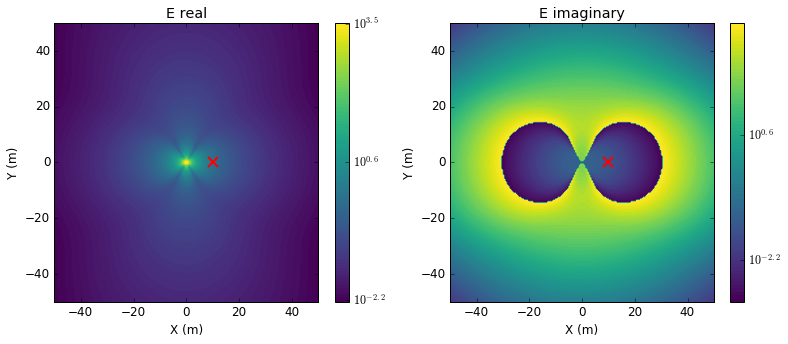

In [11]:
xloc, yloc, zloc = 10, 0, ED_full.z
fig = plt.figure(figsize=(6.5*2, 5))
ax0, ax1 = plt.subplot(121), plt.subplot(122)
ax0, dat0 = ED_full.plot2D_FD(ax=ax0,component="amplitude",view="x", logamp=True, ncontour=100, showcontour=False, colorbar=False, cmap="viridis")
vmin, vmax = dat0.cvalues.min(), dat0.cvalues.max()
clim = [vmin, vmax]
ax1, dat1 = ED_full.plot2D_FD(ax=ax1,component="phase",view="x", logamp=False, ncontour=100, showcontour=False, colorbar=False, cmap="viridis")
axs = [ax0, ax1]
dats = [dat0, dat1]
titles = ["E real", "E imaginary"]
for i in range(2):
    axs[i].plot(xloc, yloc, 'rx', ms=10, markeredgewidth=2)
    axs[i].set_title(titles[i])
    cb = plt.colorbar(dats[i],ax=axs[i], format="$10^{%.1f}$", ticks=np.linspace(vmin, vmax, 3))

In [ ]:
obsLoc=np.c_[xloc, yloc, zloc]
ED_full.eval_loc(srcLoc, obsLoc, sigvec, fvec, "x", EM.Analytics.E_galvanic_from_ElectricDipoleWholeSpace)

In [ ]:
# absloc, coordloc = xloc, yloc
# fig = plt.figure()
# ax0 = plt.subplot(111)
# ax1 = ax0.twinx()
# ax0, ax1 = self.plot_1D_RI_f_x(absloc,coordloc,ax0,ax1,sigind)
# tempfunc = lambda sigind: self.plot_1D_RI_f_x(absloc,coordloc,ax0,ax1,sigind)
# sigslider = IntSlider(min=0, max =len(sigvec)-1, step=1,value=sigind)
# interact(tempfunc, sigind=sigslider)

In [ ]:
sigslider = IntSlider(min=0, max =len(sigvec)-1, step=10,value=sigind)
freqslider = IntSlider(min=0, max =len(fvec)-1, step=10,value=find)
# obslocx = IntSlider(min=-100, max =100, step=1,value=0)
# obslocy = IntSlider(min=-100, max =100, step=1,value=0)
# obslocz = IntSlider(min=-100, max =100, step=1,value=1)
mode = ToggleButtons(options=['RI','AP'],value='RI')
# obslocx,obslocy,obslocz,sigind,freqind,mode
tempfunc = lambda sigind, freqind, mode: ED_full.plot_1D_x(xloc,yloc,zloc,sigind, freqind, mode)
interact(tempfunc,sigind=sigslider,freqind=freqslider,mode=mode)

In [ ]:
print 500*np.sqrt(1./fvec[183]/sigvec[sigind])

In [ ]:
sigind=45
freqind=70

absloc=1.
coordloc=1.

figfig = plt.figure(figsize=(50,25))
ax0 = plt.subplot(521)
ax1 = plt.subplot(522)
ax2 = plt.subplot(523)
ax3 = plt.subplot(524)
ax4 = plt.subplot(525)
ax5 = plt.subplot(526)
ax6 = plt.subplot(527)
ax7 = plt.subplot(528)
ax8 = plt.subplot(529)
ax9 = plt.subplot(5,2,10)

ax0,ax1 = self.plot_1D_AP_f_x(absloc,coordloc,ax0,ax1,sigind)
ax2,ax3 = self.plot_1D_AP_sig_x(absloc,coordloc,ax2,ax3,freqind)
ax4,ax5 = self.plot_1D_RI_f_x(absloc,coordloc,ax4,ax5,sigind)
ax6,ax7 = self.plot_1D_RI_sig_x(absloc,coordloc,ax6,ax7,freqind)
ax8 = self.plot_1D_phasor_f_x(absloc,coordloc,ax8,sigind)
ax9 = self.plot_1D_phasor_sig_x(absloc,coordloc,ax9,freqind)

plt.tight_layout()

In [ ]:
# fig = plt.figure()
# ax0 = plt.subplot(111)
# ax1 = ax0.twinx()
# ax0, ax1 = self.plot_1D_AP_f_x(absloc,coordloc,ax0,ax1,sigind)

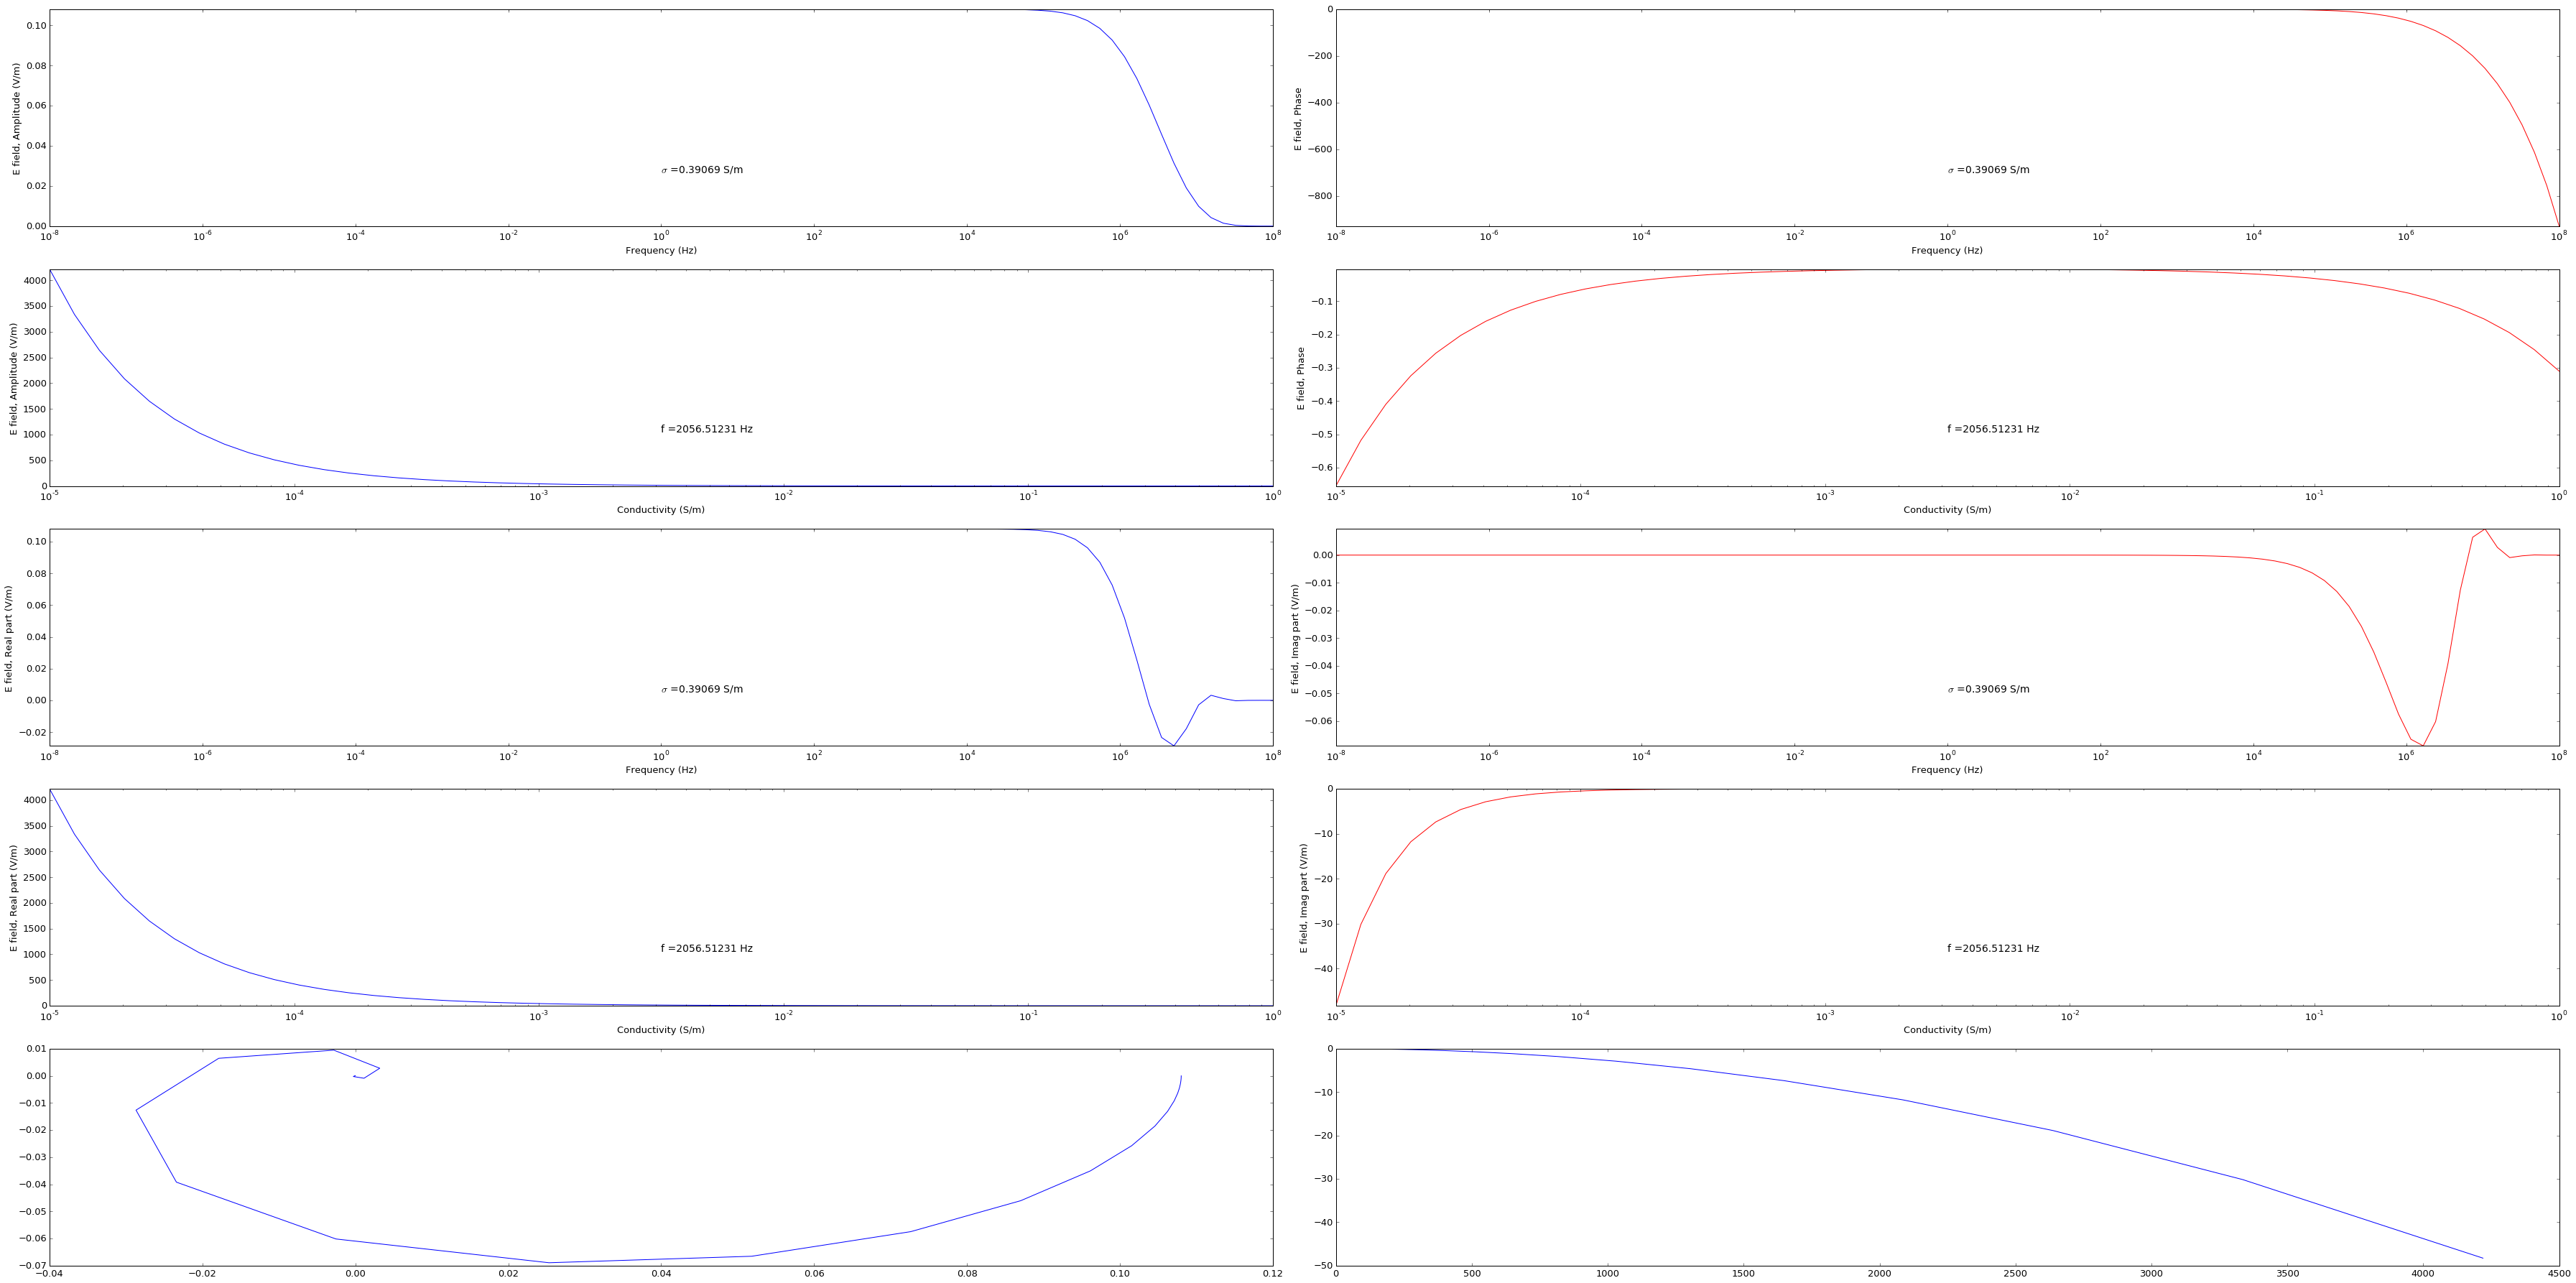

In [8]:
sigind=45
freqind=70

absloc=1.
coordloc=1.

figfig = plt.figure(figsize=(50,25))
ax0 = plt.subplot(521)
ax1 = plt.subplot(522)
ax2 = plt.subplot(523)
ax3 = plt.subplot(524)
ax4 = plt.subplot(525)
ax5 = plt.subplot(526)
ax6 = plt.subplot(527)
ax7 = plt.subplot(528)
ax8 = plt.subplot(529)
ax9 = plt.subplot(5,2,10)

ax0,ax1 = self.plot_1D_AP_f_y(absloc,coordloc,ax0,ax1,sigind)
ax2,ax3 = self.plot_1D_AP_sig_y(absloc,coordloc,ax2,ax3,freqind)
ax4,ax5 = self.plot_1D_RI_f_y(absloc,coordloc,ax4,ax5,sigind)
ax6,ax7 = self.plot_1D_RI_sig_y(absloc,coordloc,ax6,ax7,freqind)
ax8 = self.plot_1D_phasor_f_y(absloc,coordloc,ax8,sigind)
ax9 = self.plot_1D_phasor_sig_y(absloc,coordloc,ax9,freqind)

plt.tight_layout()

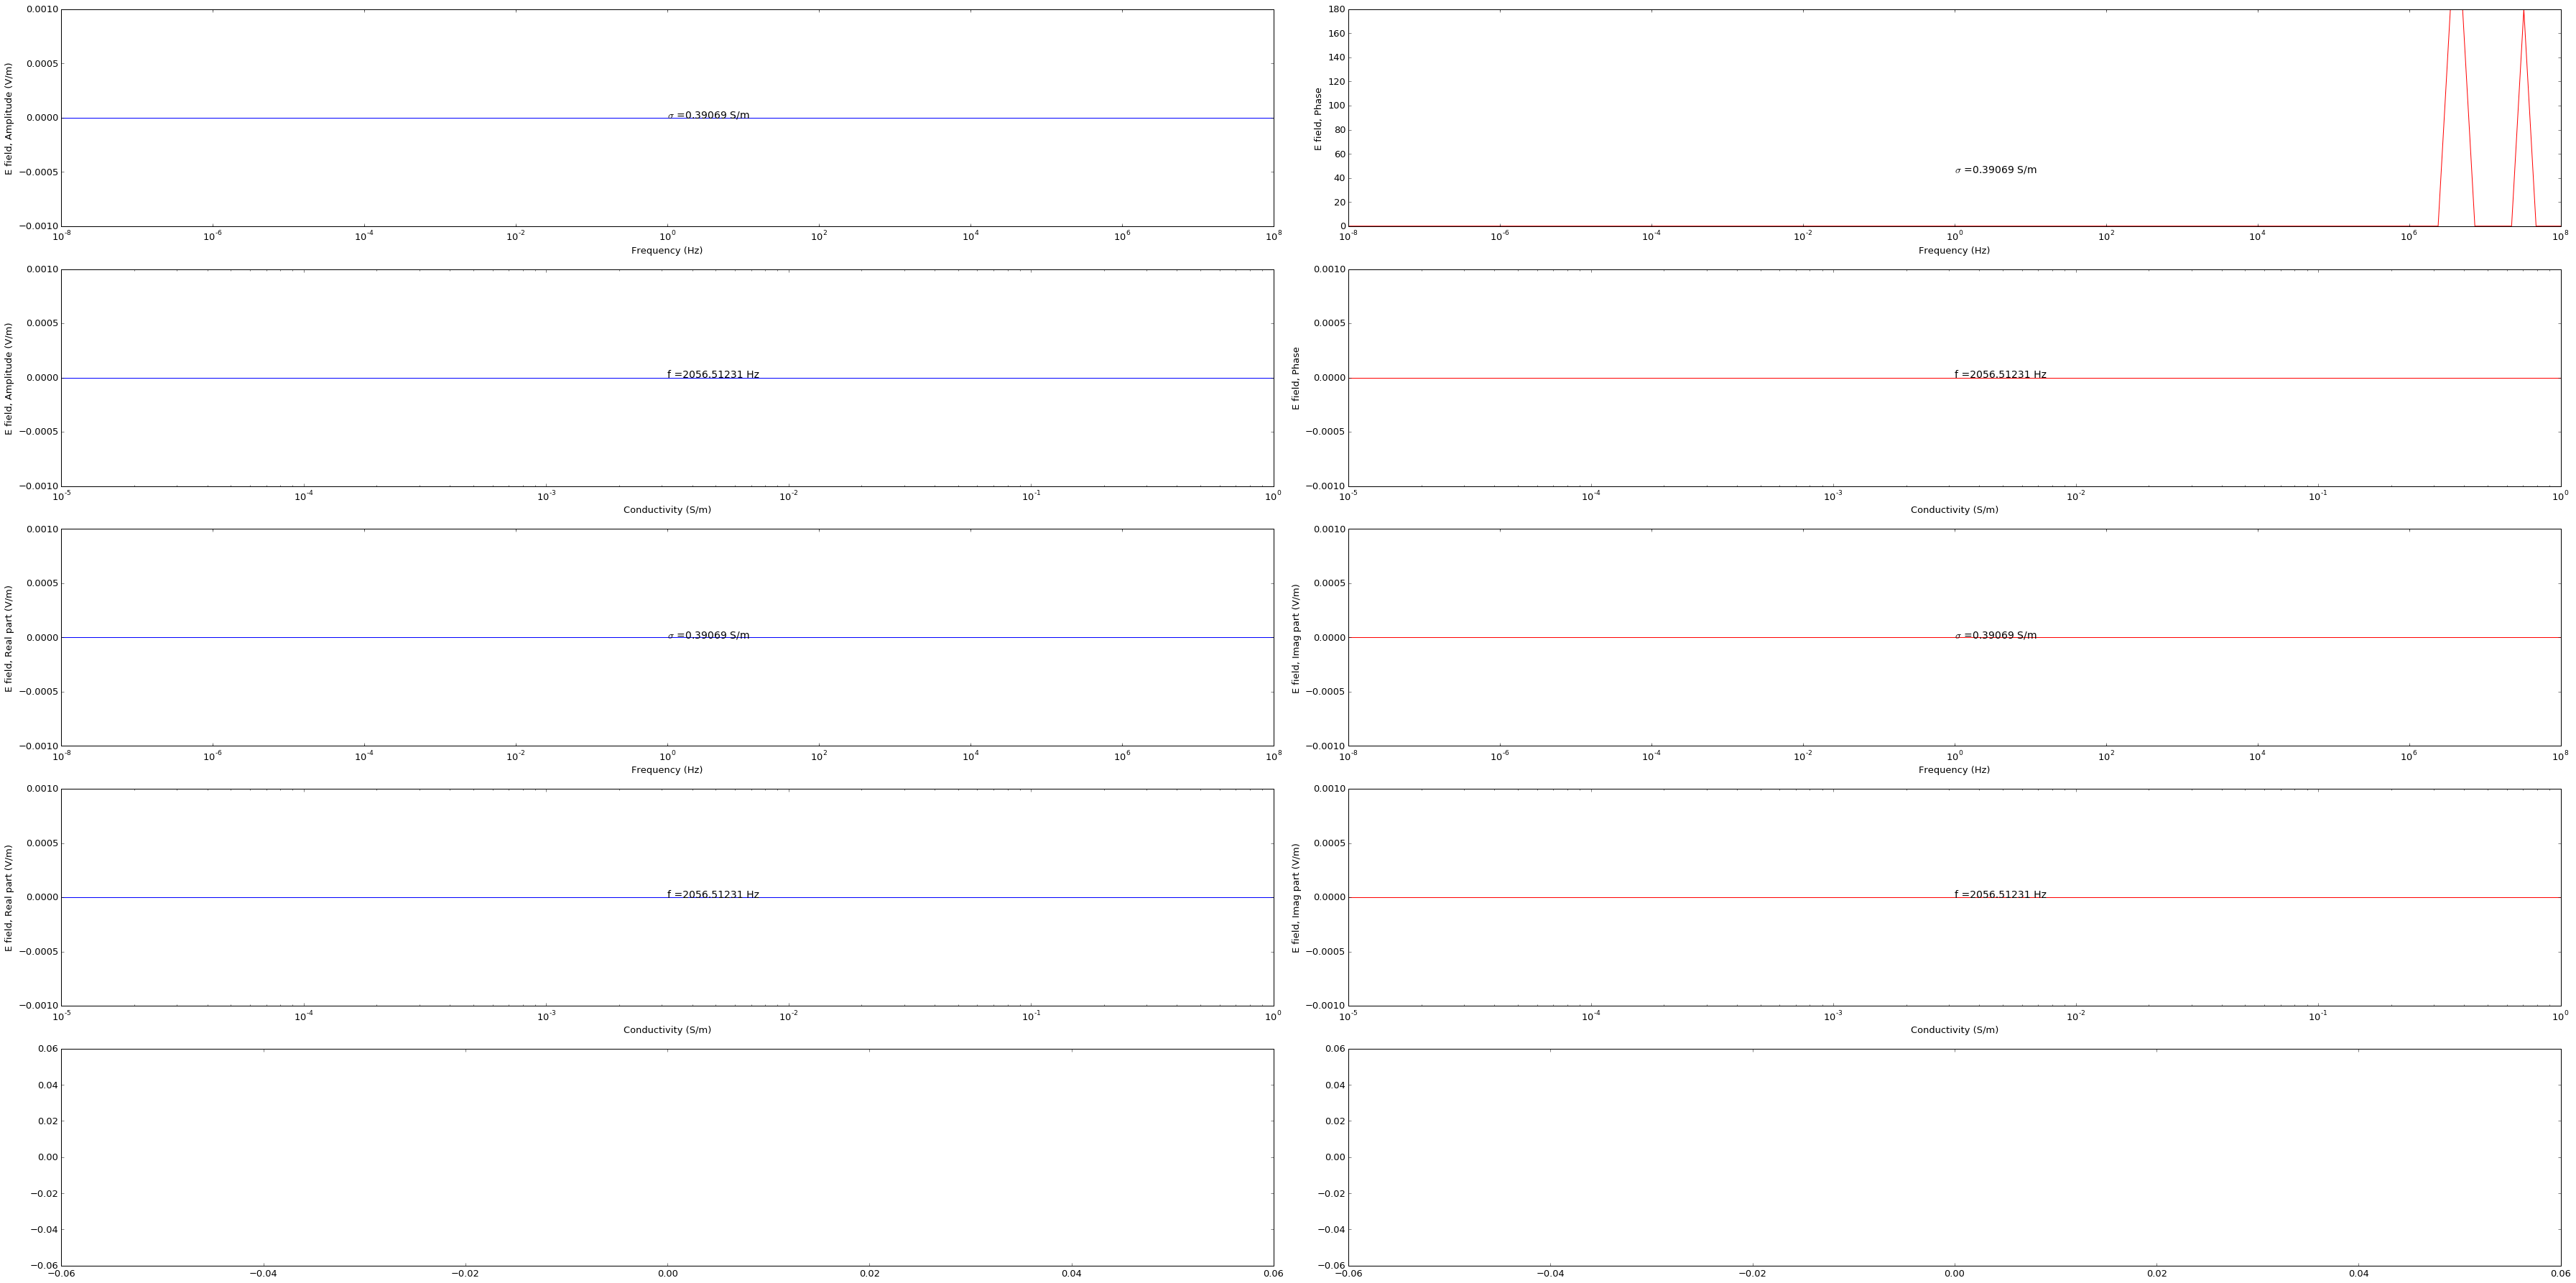

In [10]:
sigind=45
freqind=70

absloc=1.
coordloc=1.

fig = plt.figure(figsize=(50,25))
ax0 = plt.subplot(521)
ax1 = plt.subplot(522)
ax2 = plt.subplot(523)
ax3 = plt.subplot(524)
ax4 = plt.subplot(525)
ax5 = plt.subplot(526)
ax6 = plt.subplot(527)
ax7 = plt.subplot(528)
ax8 = plt.subplot(529)
ax9 = plt.subplot(5,2,10)

ax0,ax1 = self.plot_1D_AP_f_z(absloc,coordloc,ax0,ax1,sigind)
ax2,ax3 = self.plot_1D_AP_sig_z(absloc,coordloc,ax2,ax3,freqind)
ax4,ax5 = self.plot_1D_RI_f_z(absloc,coordloc,ax4,ax5,sigind)
ax6,ax7 = self.plot_1D_RI_sig_z(absloc,coordloc,ax6,ax7,freqind)
ax8 = self.plot_1D_phasor_f_z(absloc,coordloc,ax8,sigind)
ax9 = self.plot_1D_phasor_sig_z(absloc,coordloc,ax9,freqind)

plt.tight_layout()